# ***What is Computer Vision?***
Computer Vision is the Interdisciplinary scientific field, the deals with how computer can gain high-level of understanding from digital images and videos.
- Object Detection: The Ability to detect objects.
- Image Classification: Identify the class of object.
- Image Captioning: By looking at image and describing what is happening in Image.
- Image Reconstruction: To know the missing patterns to reconstruct.


# ***Approaches of Object Detection***
- ML: Making computer learn by using algo: on data & make descision similar to humans.
- DL: It uses multiple-layer approach to extract features from the data, Influanced by Artificial Nueral Networks. CNN, Yolo, Faster RCNN.

**Computer Vision:** Make able to  machine so that it can see/recognize objects.

**OpenCV:** Open source library for computer vision/machine learning/image processiog. It provides facilities to machine to recognize faces or objects.


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
image = cv.imread('Thumbnail.png')

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(720, 1280, 3)

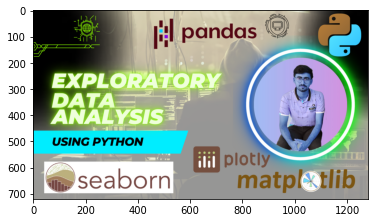

In [5]:
plt.imshow(image)

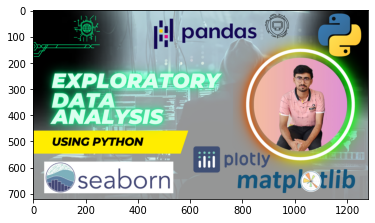

In [6]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
r, g, b = cv.split(image)
print(r.shape, '\n', g.shape, '\n', b.shape)

(720, 1280) 
 (720, 1280) 
 (720, 1280)


In [8]:
import numpy as np
import argparse
import time
import cv2 as cv
import os


In [13]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('./smaple.mp4')
confThreshold=0.5
nmsThreshold=0.3

classfilename = './coco.names'
ClassNames = []
with open(classfilename, 'rt') as f:
    ClassNames = f.read().rstrip('\n').split('\n')
# print(ClassNames)

modelConfiguration = './yolov3-tiny.cfg'
modelWeights = './yolov3-tiny.weights'

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)


def findObjects(outputs, img):
    ht, wt, ct, = img.shape
    
    bbox = []
    classids = []
    confs = []
    
    for output in outputs:
        for det in output:
            scores = det[5:]
            classid = np.argmax(scores)
            confidence = scores[classids]
            if confidence > confThreshold:
                w, h = int(det[2] * wt), int(det[3] * ht)
                x, y = int((det[0] * wt) - w/2), int((det[1] * ht) - h/2)
                bbox.append([x, y, w, h])
                classids.append(classid)
                confs.append(float(confidence))
    
    # print(len(bbox))
    indices = cv.dnn.NMSBoxes(bbox, confs, confThreshold, nmsThreshold)
    # print(indices)
    for i in range(len(bbox)):
        x,y,w,h = bbox[i]
        cv.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 2)
        cv.putText(img, f'{ClassNames[classids[i]].upper()} {int(confs[i]*100)}%', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)     


while True:
    sucess, image = cap.read()
    image = cv.flip(image, 1)
    blob = cv.dnn.blobFromImage(image, 1/255, (320, 320), (0, 0, 0), 1, crop=False)
    net.setInput(blob)
    layerNames = net.getLayerNames()
    layerNames = list(layerNames)
  
    outputNames = [layerNames[i[0]-1] for i in [[*net.getUnconnectedOutLayers()]]]
    
    outputs = net.forward(outputNames)

    # findObjects(outputs, image)
    
    ht, wt, ct, = image.shape
    
    bbox = []
    classids = []
    confs = []
    
    for output in outputs:
        for det in output:
            scores = det[5:]
            classid = np.argmax(scores)
            confidence = scores[classids]
            if confidence > confThreshold:
                w, h = int(det[2] * wt), int(det[3] * ht)
                x, y = int((det[0] * wt) - w/2), int((det[1] * ht) - h/2)
                bbox.append([x, y, w, h])
                classids.append(classid)
                confs.append(float(confidence))
    
    # print(len(bbox))
    indices = cv.dnn.NMSBoxes(bbox, confs, confThreshold, nmsThreshold)
    # print(indices)
    for i in range(len(bbox)):
        x,y,w,h = bbox[i]
        cv.rectangle(image, (x,y), (x+w, y+h), (255, 0, 255), 2)
        cv.putText(image, f'{ClassNames[classids[i]].upper()} {int(confs[i]*100)}%', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)
    
    
    cv.imshow('Image', image)
    
    if cv.waitKey(1) & 0xFF==ord('q'):
        break

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17888\1944316377.py:75: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if confidence > confThreshold:


: 

# Image

In [1]:
import cv2 as cv
import numpy as np


net = cv.dnn.readNet('yolov3-tiny.weights', 'yolov3-tiny.cfg')

ClassNames = []
with open('./coco.names', 'rt') as f:
    ClassNames = f.read().rstrip('\n').split('\n')
    
layerNames = net.getLayerNames()
layerNames = list(layerNames)  
# print(layerNames)  
outputlayer = [layerNames[i[0]-1] for i in [[*net.getUnconnectedOutLayers()]]]

# random colors
colors = np.random.uniform(0, 255, size=(len(ClassNames), 3)) 

# load image
img = cv.imread('./pexels-pixabay.jpg')
img = cv.resize(img, (400,500), 0.4, 0.4)
height, width, channel = img.shape


blob = cv.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
# for b in blob:
#     for h, img_blob in enumerate(b):
#         cv.imshow(str(h), img_blob)
    
outs = net.forward(outputlayer)

# showing information on the screen
boxes = []
confidences = []
classIds = []

for out in outs:
    for det in out:
        scores = det[5:]
        classid = np.argmax(scores)
        confidence = scores[classid]
        if confidence>0.5:
            # object detected
            centerX = int(det[0] * width)
            centerY = int(det[1] * height)
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x = int(centerX - w//2)
            y = int(centerY - h//2)
            
            # box info
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            classIds.append(classid)            

            # cv.circle(img, (centerX, centerY), 10, (0, 255, 0), 2)
            # cv.rectangle(img, (centerX - w//2, centerY - h//2), (centerX + w//2, centerY + h//2), (255, 0, 255), 2)
            # cv.putText(img, f'{ClassNames[classid].upper()} {int(confidence*100)}%', (centerX - w//2, centerY - h//2 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)


indexs = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexs)
# Labels
no_objects=len(boxes)
for i in range(no_objects):
    if i in indexs:
        x, y, w, h = boxes[i]
        label = str(ClassNames[classIds[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + (2*w)//2, y + (2*h)//2), color, 2)
        cv.putText(img, f'{label.upper()} {int(confidences[i]*100)}%', (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    print(label)
    
    
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

()


# Video

In [1]:
import cv2 as cv
import numpy as np


net = cv.dnn.readNet('yolov3-tiny.weights', 'yolov3-tiny.cfg')

ClassNames = []
with open('./coco.names', 'rt') as f:
    ClassNames = f.read().rstrip('\n').split('\n')

video = cv.VideoCapture('./smaple.mp4')
# video = video.set(cv.CAP_PROP_FPS, 30)

while video.isOpened():
    # load image
    success, img = video.read()
    # print(video.get(cv.CAP_PROP_FPS))
    # img = cv.flip(img, 1)
    img = cv.resize(img, (1000,600), 0.4, 0.4)
    height, width, channel = img.shape

    blob = cv.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
    net.setInput(blob)
    
    layerNames = net.getLayerNames()
    layerNames = list(layerNames)  
    # print(layerNames)  
    outputlayer = [layerNames[i[0]-1] for i in [[*net.getUnconnectedOutLayers()]]]
    
    outs = net.forward(outputlayer)

    # random colors
    colors = np.random.uniform(0, 255, size=(len(ClassNames), 3)) 

    # showing information on the screen
    boxes = []
    confidences = []
    classIds = []

    for out in outs:
        for det in out:
            scores = det[5:]
            classid = np.argmax(scores)
            confidence = scores[classid]
            if confidence>0.5:
                # object detected
                centerX = int(det[0] * width)
                centerY = int(det[1] * height)
                w = int(det[2] * width)
                h = int(det[3] * height)
            
                x = int(centerX - w//2)
                y = int(centerY - h//2)
            
                # box info
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                classIds.append(classid)            

                # cv.circle(img, (centerX, centerY), 10, (0, 255, 0), 2)
                # cv.rectangle(img, (centerX - w//2, centerY - h//2), (centerX + w//2, centerY + h//2), (255, 0, 255), 2)
                # cv.putText(img, f'{ClassNames[classid].upper()} {int(confidence*100)}%', (centerX - w//2, centerY - h//2 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)


    indexs = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    # Labels
    no_objects=len(boxes)
    if no_objects > 0:
        print(indexs)
            
    for i in range(no_objects):
        if i in indexs:
            x, y, w, h = boxes[i]
            label = str(ClassNames[classIds[i]])
            color = colors[i]
            cv.rectangle(img, (x, y), (x + (2*w)//2, y + (2*h)//2), color, 2)
            cv.putText(img, f'{label.upper()} {int(confidences[i]*100)}%', (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        if no_objects > 0:
            print(label)
    
    
    cv.imshow('Image', img)
    if cv.waitKey(1) & 0xFF==ord('q'):
        break
video.release()
cv.destroyAllWindows()

[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[1 0]
truck
person
[1 0]
bus
person
[1 0]
bus
person
[0]
bus
[0]
bus
[0]
bus
[1 0]
truck
person
[0 1]
truck
person
[0]
bus
[0 1]
bus
person
[0 1]
bus
person
[0]
bus
[0]
bus
[0 1]
bus
truck
[2 0 1]
bus
truck
person
[0 1]
bus
truck
[0 1]
bus
truck
[0 1]
bus
truck
[0 1]
bus
truck
[0 1]
bus
truck
[0 1 2]
bus
truck
person
[0 2 1]
bus
truck
person
[0 2 1 3]
bus
truck
person
person
[0 2 1]
bus
truck
person
person
[0 1 2]
bus
truck
person
[0 1]
bus
truck
[0 1 2]
bus
truck
person
[0 1]
bus
truck
[0 1]
bus
person
[0 1]
bus
person
[0 1]
bus
person
[0 1]
bus
person
[1 0]
bus
person
[0 1]
bus
person
[0 1]
bus
person
[0 1]
bus
person
[0 1]
bus
person
[1 0]
bus
person
[1 0]
bus
person
[1 0]
bus
person
[1 0]
bus
person
[1 0]
bus
person
[1 0]
bus
person
[2 0 1]
bus
truck
person
[1 0]
bus
person
[1 0]
bus
person
[1 0]
bus
person
person
[1 0]
bus
person
person
[1 0]
bus
pers

# Webcam

In [2]:
import cv2 as cv
import numpy as np


net = cv.dnn.readNet('yolov3-tiny.weights', 'yolov3-tiny.cfg')

ClassNames = []
with open('./coco.names', 'rt') as f:
    ClassNames = f.read().rstrip('\n').split('\n')

video = cv.VideoCapture(0)

while video.isOpened():
    # load image
    success, img = video.read()
    img = cv.flip(img, 1)
    img = cv.resize(img, (800,600), 0.4, 0.4)
    height, width, channel = img.shape

    blob = cv.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
    net.setInput(blob)
    
    layerNames = net.getLayerNames()
    layerNames = list(layerNames)  
    # print(layerNames)  
    outputlayer = [layerNames[i[0]-1] for i in [[*net.getUnconnectedOutLayers()]]]
    
    outs = net.forward(outputlayer)

    # random colors
    colors = np.random.uniform(0, 255, size=(len(ClassNames), 3)) 

    # showing information on the screen
    boxes = []
    confidences = []
    classIds = []

    for out in outs:
        for det in out:
            scores = det[5:]
            classid = np.argmax(scores)
            confidence = scores[classid]
            if confidence>0.5:
                # object detected
                centerX = int(det[0] * width)
                centerY = int(det[1] * height)
                w = int(det[2] * width)
                h = int(det[3] * height)
            
                x = int(centerX - w//2)
                y = int(centerY - h//2)
            
                # box info
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                classIds.append(classid)            

                # cv.circle(img, (centerX, centerY), 10, (0, 255, 0), 2)
                # cv.rectangle(img, (centerX - w//2, centerY - h//2), (centerX + w//2, centerY + h//2), (255, 0, 255), 2)
                # cv.putText(img, f'{ClassNames[classid].upper()} {int(confidence*100)}%', (centerX - w//2, centerY - h//2 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)


    indexs = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    # Labels
    no_objects=len(boxes)
    if no_objects > 0:
        print(indexs)
            
    for i in range(no_objects):
        if i in indexs:
            x, y, w, h = boxes[i]
            label = str(ClassNames[classIds[i]])
            color = colors[i]
            cv.rectangle(img, (x, y), (x + (2*w)//2, y + (2*h)//2), color, 2)
            cv.putText(img, f'{label.upper()} {int(confidences[i]*100)}%', (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        if no_objects > 0:
            print(label)
    
    
    cv.imshow('Image', img)
    if cv.waitKey(1) & 0xFF==ord('q'):
        break
video.release()
cv.destroyAllWindows()

[0]
chair
[0]
chair
[0]
chair
[0]
chair
[0]
chair
[0]
person
[0]
chair
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[1]
laptop
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
person
[0]
person
[0]
laptop
[0]
person
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0 1]
person
laptop
[1 0]
person
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
person
[0]
person
[0]
person
[1]
person
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[1]
person
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0]
person
[0 1]
person
laptop
[1 0]
person
laptop
[0 1]
person
laptop
[1 0]
person
laptop
[1 0]
person
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[0]
laptop
[1 0]
person
laptop
[1 0]
person
laptop
[1 0]
person
laptop
[1 0

In [ ]:
q